<a href="https://colab.research.google.com/github/shashi3876/CalculateBaconNumber/blob/main/PapayaSeedCounting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python-headless matplotlib

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
import io

Saving Screenshot 2025-04-07 at 10.04.13 PM.png to Screenshot 2025-04-07 at 10.04.13 PM.png


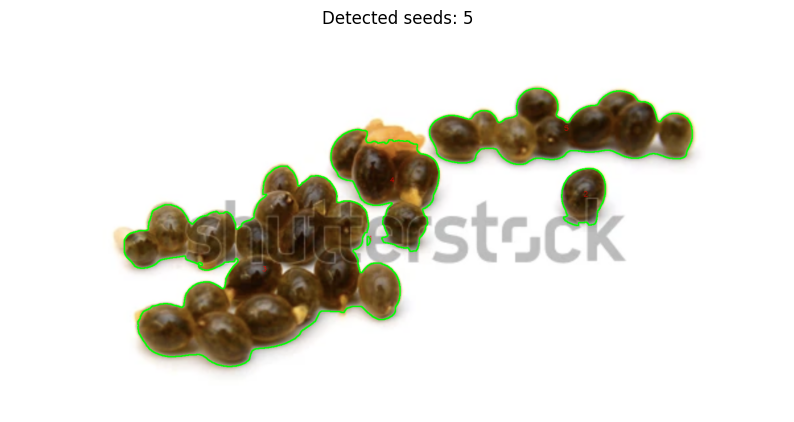

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:




# Upload image
uploaded = files.upload()

# Load uploaded image
image_name = next(iter(uploaded))
image = cv2.imdecode(np.frombuffer(uploaded[image_name], np.uint8), cv2.IMREAD_COLOR)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Preprocessing
blurred = cv2.GaussianBlur(gray, (7, 7), 0)
_, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter small contours (noise)
min_area = 3
seed_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

# Label each detected seed
output = image.copy()
for i, cnt in enumerate(seed_contours):
    M = cv2.moments(cnt)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
        cv2.drawContours(output, [cnt], -1, (0, 255, 0), 2)
        cv2.putText(output, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

# Show labeled image
output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(output_rgb)
plt.title(f"Detected seeds: {len(seed_contours)}")
plt.axis("off")
plt.show()

# Save and download
output_image = Image.fromarray(output_rgb)
output_image.save("labeled_seeds.png")
files.download("labeled_seeds.png")
